In [15]:
import numpy as np 
from sklearn.model_selection  import train_test_split # Biblioteca para dividior os dados teste e treino
from sklearn.tree import DecisionTreeClassifier # Importa o algoritmo da arvore de decisão
from sklearn import tree # Biblioteca para plotar a arvore de decisão
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score # Métrica de acurácia do algoritmo (acurácia= acertos / acertos+erros)
from sklearn.metrics import confusion_matrix # Importa a matriz de confusão
from sklearn.preprocessing import LabelEncoder # Biblioteca para converter string em número para que o sklearn consiga usar


In [12]:
data = pd.DataFrame({
    'Precisão na Montagem': ['Alta', 'Média', 'Alta', 'Média', 'Baixa', 'Baixa'],
    'Velocidade de Produção': ['Média', 'Baixa', 'Alta', 'Alta', 'Baixa', 'Média'],
    'Taxa de Retrabalho': ['Baixa', 'Alta', 'Baixa', 'Baixa', 'Alta', 'Alta'],
    'Classificação': ['Alta Qualidade', 'Baixa Qualidade', 'Alta Qualidade', 'Alta Qualidade', 'Baixa Qualidade', 'Baixa Qualidade']
})

In [16]:
le_precisao = LabelEncoder()
le_classificacao = LabelEncoder()

data['Precisão na Montagem'] = le_precisao.fit_transform(data['Precisão na Montagem'])
data['Classificação'] = le_classificacao.fit_transform(data['Classificação'])

In [17]:
x = np.array(data['Precisão na Montagem'])
y = np.array(data['Classificação'])

0.5 [[1 0]
 [1 0]]


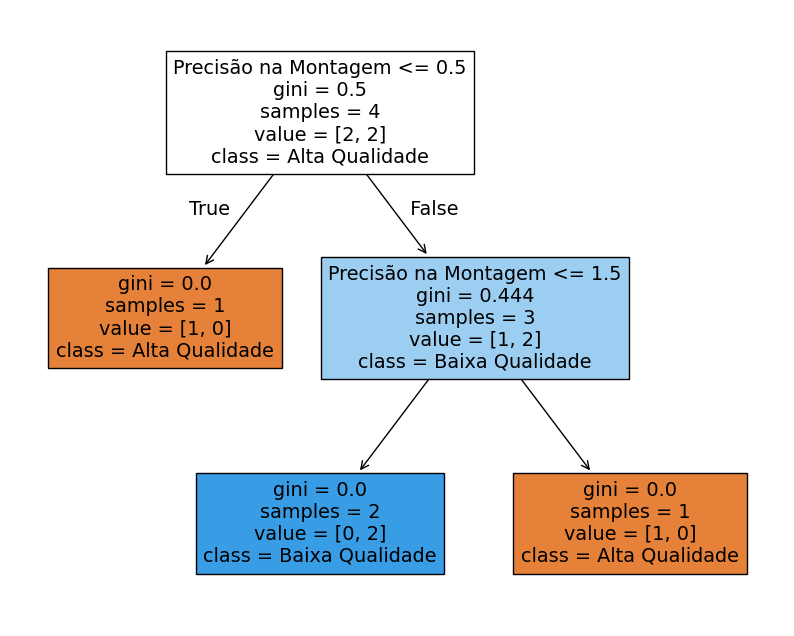

In [21]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), 
                                                        test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino, y_treino)
prev = model.predict(x_teste)
accuracy = accuracy_score(y_teste, prev)
matriz = confusion_matrix(y_teste, prev)
print(accuracy, matriz)
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model, feature_names=['Precisão na Montagem'], class_names=le_classificacao.classes_, filled=True)

plt.show()